In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# crear dataframe de diccionario anidado de diccionarios

data_1 = {"Monterrey":{"1990":10.0,"2000":11.0,"2010":12.0,"2020":13.0}}
data_2 = {"Chihuahua":{"1990":12.0,"2000":14.0,"2010":15.0,"2020":15.0}}
data_3 = {"Queretaro":{"1990":13.0,"2000":12.0,"2010":18.0,"2020":12.0}}
data_4 = {"Pachuca":{"1990":15.0,"2000":17.0,"2010":17.0,"2020":19.0}}
data_5 = {"Pachuca":{"1991":15.0,"2001":17.0,"2011":17.0,"2021":19.0}}

# unir varios diccionarios en uno solo
all_data = data_1 | data_2 | data_3 | data_4 | data_5
# crear el dataframe
df = pd.DataFrame(all_data)
header = "Resultado".center(100,"-")
print(header)
columns = df.columns
print(columns)
for row in df.itertuples():
    # how to format the row text
    # maybe iterate over the ites of the row and concatenate
    out = "%10s | %010s | %010s | %010s |"% (row[0],row[1],row[2],row[3])
    length = len(out)
    spacer = "".center(length,"-")
    print(spacer)
    print(out)
    



---------------------------------------------Resultado----------------------------------------------
Index(['Monterrey', 'Chihuahua', 'Queretaro', 'Pachuca'], dtype='object')
---------------------------------------------------
      1990 |       10.0 |       12.0 |       13.0 |
---------------------------------------------------
      2000 |       11.0 |       14.0 |       12.0 |
---------------------------------------------------
      2010 |       12.0 |       15.0 |       18.0 |
---------------------------------------------------
      2020 |       13.0 |       15.0 |       12.0 |
---------------------------------------------------
      1991 |        nan |        nan |        nan |
---------------------------------------------------
      2001 |        nan |        nan |        nan |
---------------------------------------------------
      2011 |        nan |        nan |        nan |
---------------------------------------------------
      2021 |        nan |        nan |       

In [44]:
# Print a header to inform the title of the table
# --> Extract the total wide of the table to assign the wide of thr title
print("Resultado".center(100,"-"))
# extract all columns anmes
columns = df.columns
# get the column name max length text size
col_lens = [] # declare a list to storage column name len
# to obtain the maximum
print(len(df.columns.max()))
for col in df.columns:
    col_lens.append(len(col))
max_col = max(col_lens)
print(f"Maximo de caractares de nombres de columnas {max_col}")
print(columns)
for row in df.itertuples():
    # how to format the row text
    # maybe iterate over the ites of the row and concatenate
    out = "%10s | %10s | %10s | %10s |"% (row[0],row[1],row[2],row[3])
    length = len(out)
    spacer = "".center(length,"-")
    print(spacer)
    print(out)

---------------------------------------------Resultado----------------------------------------------
9
Maximo de caractares de nombres de columnas 9
Index(['Monterrey', 'Chihuahua', 'Queretaro', 'Pachuca'], dtype='object')
---------------------------------------------------
      1990 |       10.0 |       12.0 |       13.0 |
---------------------------------------------------
      2000 |       11.0 |       14.0 |       12.0 |
---------------------------------------------------
      2010 |       12.0 |       15.0 |       18.0 |
---------------------------------------------------
      2020 |       13.0 |       15.0 |       12.0 |
---------------------------------------------------
      1991 |        nan |        nan |        nan |
---------------------------------------------------
      2001 |        nan |        nan |        nan |
---------------------------------------------------
      2011 |        nan |        nan |        nan |
-------------------------------------------------

In [61]:
# explore the functionality of max apply to a string list
# WIth a list of string
# get the 
str_list = ["Luis","Abigail","pepe","Luisito","Parangaricutirimicuaro","Parangaricutirimicuaro","Parangaricutirimicuaro"]
max_len = []
word_aux = 0
word_catched = ""
repeated_words = 0
for word in str_list:
    len_word = len(word)
    if len_word > word_aux:
        word_catched = word
        word_aux = len_word
    elif len_word == word_aux:
        repeated_words += 1
    max_len.append(len(word))
max_text = max(max_len)
final_result = f"Palabra maxima -> {word_catched} repetidas -> {repeated_words} maximos chars -> {max_text}"
print(final_result)


Palabra maxima -> Parangaricutirimicuaro repetidas -> 3 maximos chars -> 22


In [6]:
# get the total size of the dataframe
# Use the index property to get the total registers, and as result the size in axis 0
print(df.index.size)

8


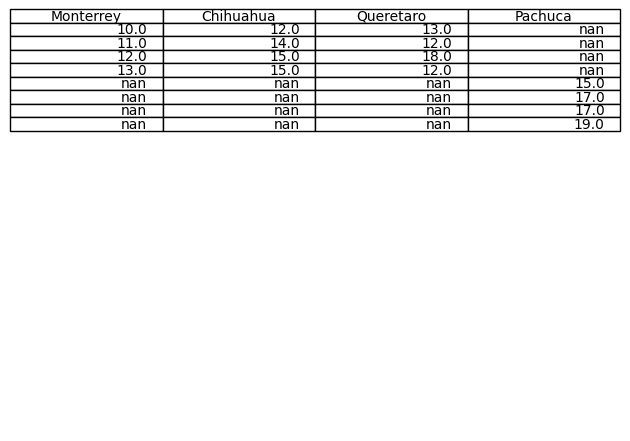

In [17]:
# replace Nan values for 0.0
fig, ax = plt.subplots()
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax = plt.table(cellText=df.values,colLabels=df.columns,loc="top")
fig.tight_layout()
plt.show()

In [14]:
# transponer filas y columnas
df_t = df.T

In [15]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Monterrey to Pachuca
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    4 non-null      float64
 1   2000    4 non-null      float64
 2   2010    4 non-null      float64
 3   2020    4 non-null      float64
 4   1991    4 non-null      float64
 5   2001    4 non-null      float64
 6   2011    4 non-null      float64
 7   2021    4 non-null      float64
dtypes: float64(8)
memory usage: 460.0+ bytes


In [19]:
# Establecer el atributo name a el index y a las columnas
df.index.name = "Estados"
df.columns.name = "Years"
print(df.index.name)

Estados


In [20]:
df

Years,Monterrey,Chihuahua,Queretaro,Pachuca
Estados,,,,
1990,10.0,12.0,13.0,0.0
2000,11.0,14.0,12.0,0.0
2010,12.0,15.0,18.0,0.0
2020,13.0,15.0,12.0,0.0
1991,0.0,0.0,0.0,15.0
2001,0.0,0.0,0.0,17.0
2011,0.0,0.0,0.0,17.0
2021,0.0,0.0,0.0,19.0


In [20]:
# append nuevos indices a el index
df.index.append(pd.Index([2022,2024]))

Index(['1990', '2000', '2010', '2020', '1991', '2001', '2011', '2021', 2022,
       2024],
      dtype='object')

In [18]:
df

Index(['1990', '2000', '2010', '2020', '1991', '2001', '2011', '2021', 2022,
       2024],
      dtype='object')

In [25]:
# Creacion de datafram con metodo de nunmpy
df_data = pd.DataFrame(np.arange(9).reshape((3,3)),
                        index = ["a","c","d"],
                        columns = ["Ohio","Texas","California"])

In [26]:
df_data

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [27]:
# reindexacion de filas
df_data.reindex(index=["a","b","c","d"])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [28]:
# reindexacion de columnas
states = ["Texas","Utha","California"]
df_data.reindex(columns=states)
# como 'Ohiio' no estaba en states, queda fuera del resultado

,Texas,Utha,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [38]:
# otra forma de reindexar es pasar los nombres de las etiquetas como
# un argumento posicional

# crear nuevo dataframe
df_meses = pd.DataFrame(np.arange(12).reshape((4,3)),
                        index = ["a","b","c","d"],
                        columns= ["ENE","FEB","MAR"])
new_months = ["FEB","MAR","ABR"]
new_index = ["a","b","d","e","f"]
# pasar el reindexado mediante argumento posicional
df_meses = df_meses.reindex(new_months,axis="columns")
df_meses = df_meses.reindex(new_index,axis="index")
df_meses = df_meses.fillna(0)
df_meses

,FEB,MAR,ABR
a,1.0,2.0,0.0
b,4.0,5.0,0.0
d,10.0,11.0,0.0
e,0.0,0.0,0.0
f,0.0,0.0,0.0
